# Section 7

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    'text.latex.preamble': r"\usepackage{amsmath}"
})

In [5]:
import irbasis3

## Generate IR basis by singular value expansion

In [6]:
# Create kenerl for lambda_ = 100 and beta = 10
# The default value of eps ``cutoff for singular values" is
# set to 2.2e-16.
# In this sample, we compute fewer basis functions.
lambda_ = 100
beta = 10
wmax = lambda_/beta
K = irbasis3.KernelFFlat(lambda_=100)
basis = irbasis3.FiniteTempBasis(
    K, statistics='F', beta=beta, eps=1e-10)

## Fitting $\rho(\omega)$

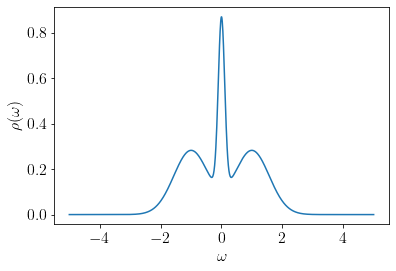

In [8]:
# Three Gaussian peaks (normalized to 1)
gaussian = lambda x, mu, sigma: np.exp(-((x-mu)/sigma)**2)/(np.sqrt(np.pi)*sigma)

rho = lambda omega: 0.2*gaussian(omega, 0.0, 0.15) + \
    0.4*gaussian(omega, 1.0, 0.8) + 0.4*gaussian(omega, -1.0, 0.8)

omegas = np.linspace(-5, 5, 1000)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$\rho(\omega)$')
plt.plot(omegas, rho(omegas))

Text(0, 0.5, '$|\\rho_l|$')

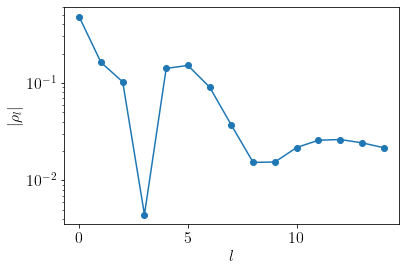

In [19]:
rhol = basis.v.overlap(rho)
plt.semilogy(np.abs(rhol[::2]), marker='o')
plt.xlabel(r'$l$')
plt.ylabel(r'$|\rho_l|$')

Text(0, 0.5, '$|g_l|$')

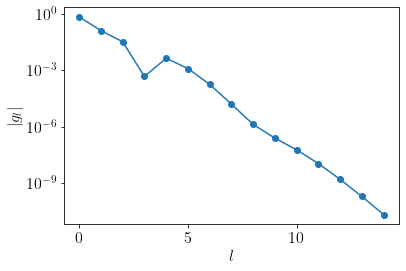

In [22]:
gl = -basis.s * rhol
plt.semilogy(np.abs(gl[::2]), marker='o')
plt.xlabel(r'$l$')
plt.ylabel(r'$|g_l|$')

## From IR to $\tau$

In [30]:
def eval_gtau(taus):
    uval = basis.u(taus)
    return uval.T @ gl

Text(0, 0.5, '$G(\\tau)$')

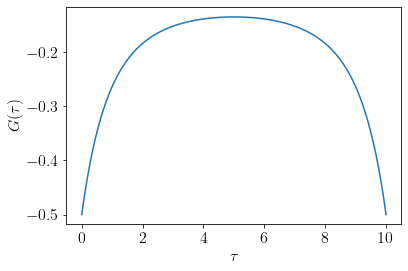

In [31]:
taus = np.linspace(0, beta, 1000)
uval = basis.u(taus)
gtaus = uval.T @ gl
plt.plot(taus, gtaus)
plt.xlabel(r'$\tau$')
plt.ylabel(r'$G(\tau)$')

## Reconstruct $g_l$ by numerical integration

$$
g_l = \int_0^\beta d\tau U_l(\tau) G(\tau)
$$

In [32]:
gl_reconst = basis.u.overlap(eval_gtau)

## Reconstruct $g_l$ by sparse sampling (fitting)

In [41]:
smpl = irbasis3.TauSampling(basis)
print("Sampling points: ", smpl.sampling_points)
print("Condition number: ", smpl.cond)
gl_reconst_sparse = smpl.fit(eval_gtau(smpl.sampling_points))

Sampling points:  [0.01254038 0.02508075 0.0846084  0.17969895 0.31247002 0.48595941
 0.70421951 0.97237343 1.29652855 1.68336935 2.13916506 2.66791199
 3.26855641 3.93189993 4.6387471  5.3612529  6.06810007 6.73144359
 7.33208801 7.86083494 8.31663065 8.70347145 9.02762657 9.29578049
 9.51404059 9.68752998 9.82030105 9.9153916  9.97491925 9.98745962]
Condition number:  5.897702173686458


## Comparison

Text(0, 0.5, '$|g_l|$')

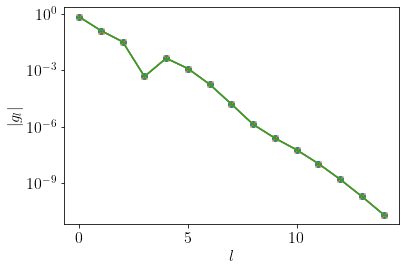

In [43]:
gl = -basis.s * rhol
plt.semilogy(np.abs(gl[::2]), marker='o')
plt.semilogy(np.abs(gl_reconst[::2]), marker='x')
plt.semilogy(np.abs(gl_reconst_sparse[::2]), marker='+')
plt.xlabel(r'$l$')
plt.ylabel(r'$|g_l|$')